In [1]:
%reload_ext autoreload
%autoreload 2
from IPython.display import display

In [2]:
import sys

import matplotlib.pylab as plt
import numpy as np

sys.path.append('../')
from tsdr import tsdr
from tsdr.outlierdetection.ar import AROutlierDetector

In [3]:
series = {
    'c-user_cpu_usage_seconds_total': [0.0225, 0.0357, 0.0432, 0.0431, 0.0407,
                                    0.0411, 0.0423, 0.0474, 0.0373, 0.0431,
                                    0.0388, 0.0238, 0.0402, 0.0412, 0.0356,
                                    0.0425, 0.044, 0.0424, 0.0448, 0.0434,
                                    0.0423, 0.0338, 0.0387, 0.0385, 0.045,
                                    0.0416, 0.046, 0.0433, 0.0415, 0.0408,
                                    0.0407, 0.0341, 0.0396, 0.0397, 0.0387,
                                    0.0465, 0.043, 0.0447, 0.0476, 0.0549,
                                    0.0535, 0.0513, 0.0304, 0.0379, 0.0377,
                                    0.0428, 0.0452, 0.042, 0.0422, 0.0377,
                                    0.047, 0.0333, 0.0416, 0.0398, 0.0476,
                                    0.0447, 0.0432, 0.042, 0.0456, 0.0493,
                                    0.0452, 0.0423, 0.0319, 0.0358, 0.0352,
                                    0.0372, 0.0452, 0.0497, 0.0545, 0.0491,
                                    0.0448, 0.0359, 0.0445, 0.0491, 0.0519,
                                    0.0533, 0.0494, 0.0467, 0.045, 0.0478,
                                    0.0501, 0.0401, 0.0524, 0.0516, 0.0275,
                                    0.036, 0.0335, 0.0403, 0.0434, 0.0441,
                                    0.0494, 0.0473, 0.0465, 0.0299, 0.0377,
                                    0.0353, 0.0214, 0.0174, 0.0231, 0.0247,
                                    0.0175, 0.0242, 0.0212, 0.025, 0.0231,
                                    0.0269, 0.0252, 0.028, 0.0251, 0.0265,
                                    0.0252, 0.0266, 0.028, 0.0288, 0.0295,
                                    0.032, 0.0292, 0.0373, 0.0403, 0.0414],
    'c-carts-db_memory_failures_total': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
                                      0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
                                      0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.9508,
                                      2.9369, 1.9131, 2.9179, 2.7924, 2.2931,
                                      1.3214, 1.5059, 1.472, 0.0, 0.0, 0.0, 0.0,
                                      0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
                                      0.0, 0.0, 0.0, 0.0, 0.0, 2.0085, 1.4933,
                                      1.4866, 0.0, 1.367, 1.5129, 2.5825,
                                      2.6696, 5.9284, 5.1588, 5.8337, 0.0, 0.0,
                                      0.0, 0.0, 0.0, 0.0, 1.65, 2.4383, 3.4508,
                                      2.9662, 2.8583, 0.0, 0.0, 0.0, 0.0, 0.0,
                                      0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
                                      0.0, 0.0, 1.9531, 3.6666, 3.6073, 2.3685,
                                      1.8385, 0.0, 0.0, 1.7919, 1.4386, 1.4092,
                                      4.3629, 5.96, 1.6146, 1.2503, 0.0, 0.0,
                                      0.0, 0.0, 176.3396, 164.1605, 3.0662,
                                      2.7789, 0.0, 0.0, 0.0, 0.0, 3.1038,
                                      5.7763, 4.4485, 1.4599, 0.0, 0.0, 0.0,
                                      0.0],
'c-front-end_network_receive_packets_total': [561.0906, 632.6935, 768.0747,
                                               738.9266, 700.6433, 681.9304,
                                               724.6866, 778.3013, 748.0828,
                                               589.5443, 667.2577, 695.7911,
                                               541.7727, 740.7474, 693.739,
                                               703.6579, 713.6439, 730.4169,
                                               736.681, 732.7455, 674.417,
                                               638.0001, 624.2325, 698.8214,
                                               738.9328, 735.2551, 479.4439,
                                               738.4606, 546.6352, 704.1132,
                                               674.8906, 690.2777, 685.114,
                                               692.6547, 734.8316, 732.9956,
                                               706.4696, 738.6445, 782.9129,
                                               855.5601, 859.652, 757.043,
                                               681.7075, 656.8483, 688.5152,
                                               754.1207, 646.9104, 716.7962,
                                               708.0092, 753.7521, 780.9341,
                                               746.9323, 684.744, 689.6845,
                                               758.0686, 759.1961, 733.5348,
                                               706.0805, 748.5516, 640.865,
                                               779.5374, 727.2776, 707.202,
                                               624.1975, 591.3398, 550.0949,
                                               702.4112, 797.5333, 832.9527,
                                               773.5715, 757.7617, 737.9336,
                                               818.1013, 810.0373, 568.8202,
                                               836.9384, 810.719, 751.6091,
                                               751.8751, 783.3643, 814.6926,
                                               854.7332, 835.508, 744.7224,
                                               585.7084, 612.6072, 527.2571,
                                               712.6166, 693.5164, 802.5811,
                                               798.3833, 781.8531, 763.9154,
                                               737.767, 643.8546, 544.0199,
                                               496.1748, 423.6785, 465.4695,
                                               429.7268, 415.3967, 399.2338,
                                               402.4811, 434.9799, 405.9439,
                                               477.7258, 462.9737, 512.1589,
                                               472.6371, 483.5036, 493.4627,
                                               487.658, 491.6888, 484.0285,
                                               562.6607, 553.017, 629.4886,
                                               651.2349, 689.9138, 647.0471]
}

In [4]:
from statsmodels.tsa.ar_model import (AutoReg, AutoRegResultsWrapper,
                                      ar_select_order)
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.tsatools import lagmat

def ar_based_ad(series, ar_lag=0, ar_threshold: float = 0.01, trend='n', ic='aic'):
    sel = ar_select_order(series, maxlag=int(series.size * 0.2), trend=trend, ic=ic)
    model_fit = sel.model.fit()
    r = model_fit.ar_lags[-1]
    if r < 12:
        r = 12
    print('lag:', r)

    pred_results = model_fit.get_prediction()
    preds = pred_results.predicted_mean
    preds = preds[r:] ##
    var = pred_results.var_pred_mean
    sig2 = var[r]
    if sig2 == 0:
        return [], [], model_fit
    # params = model_fit.params
    # x, y = lagmat(series, r, original="sep")
    # print(params[:5])
    # x = x[:, np.asarray(r) - 1]
    # print(x[:5])
    # print(x @ params)

    scores: np.ndarray = np.zeros(series.size, dtype=np.float32)
    for i, (xi, pred) in enumerate(zip(series[r:], preds)):
        scores[i] = (xi - pred) ** 2 / sig2
    # error = mean_squared_error(actual_data, preds)
    # print('error', error)
    if not np.all(np.isfinite(scores)):
        raise ValueError(f"scores must contain only finite values. {scores}")
    outliers, abn_th = AROutlierDetector.detect_by_fitting_dist(scores, threshold=ar_threshold)
    return outliers, scores, preds, r

lag: 12
lag: 12
lag: 12


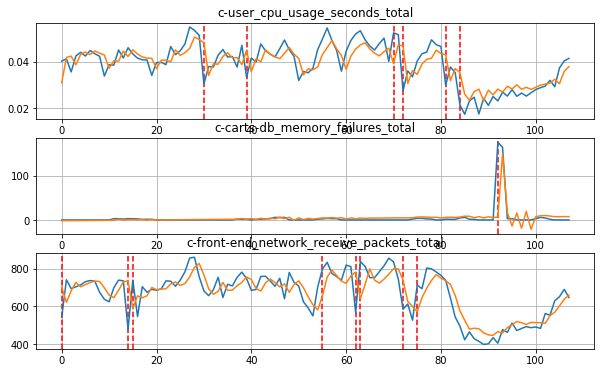

In [5]:
fig, axs = plt.subplots(len(series))
fig.set_size_inches(10, 2*len(series))
for (name, ts), ax in zip(series.items(), axs):
    outliers, scores, preds, lag = ar_based_ad(np.array(ts), ar_threshold=0.1, trend='ct', ic='aic')
    for (idx, score) in outliers:
        ax.axvline(idx, color='red', linestyle='dashed', label='breaks')
    ax.set_title(name)
    ax.plot(ts[lag:])
    ax.plot(preds)
    ax.grid()

# SST (Singular Spectrum Transformation)

In [6]:
import banpei

CPU times: user 13.9 ms, sys: 163 µs, total: 14.1 ms
Wall time: 14.1 ms
CPU times: user 15.1 ms, sys: 0 ns, total: 15.1 ms
Wall time: 15.1 ms
CPU times: user 14.3 ms, sys: 0 ns, total: 14.3 ms
Wall time: 14.3 ms
CPU times: user 25.9 ms, sys: 4 µs, total: 25.9 ms
Wall time: 25.8 ms
CPU times: user 26.2 ms, sys: 0 ns, total: 26.2 ms
Wall time: 26.2 ms
CPU times: user 26.9 ms, sys: 0 ns, total: 26.9 ms
Wall time: 26.9 ms
CPU times: user 15 ms, sys: 0 ns, total: 15 ms
Wall time: 15 ms
CPU times: user 14.3 ms, sys: 10 µs, total: 14.3 ms
Wall time: 14.4 ms
CPU times: user 14.5 ms, sys: 0 ns, total: 14.5 ms
Wall time: 14.5 ms


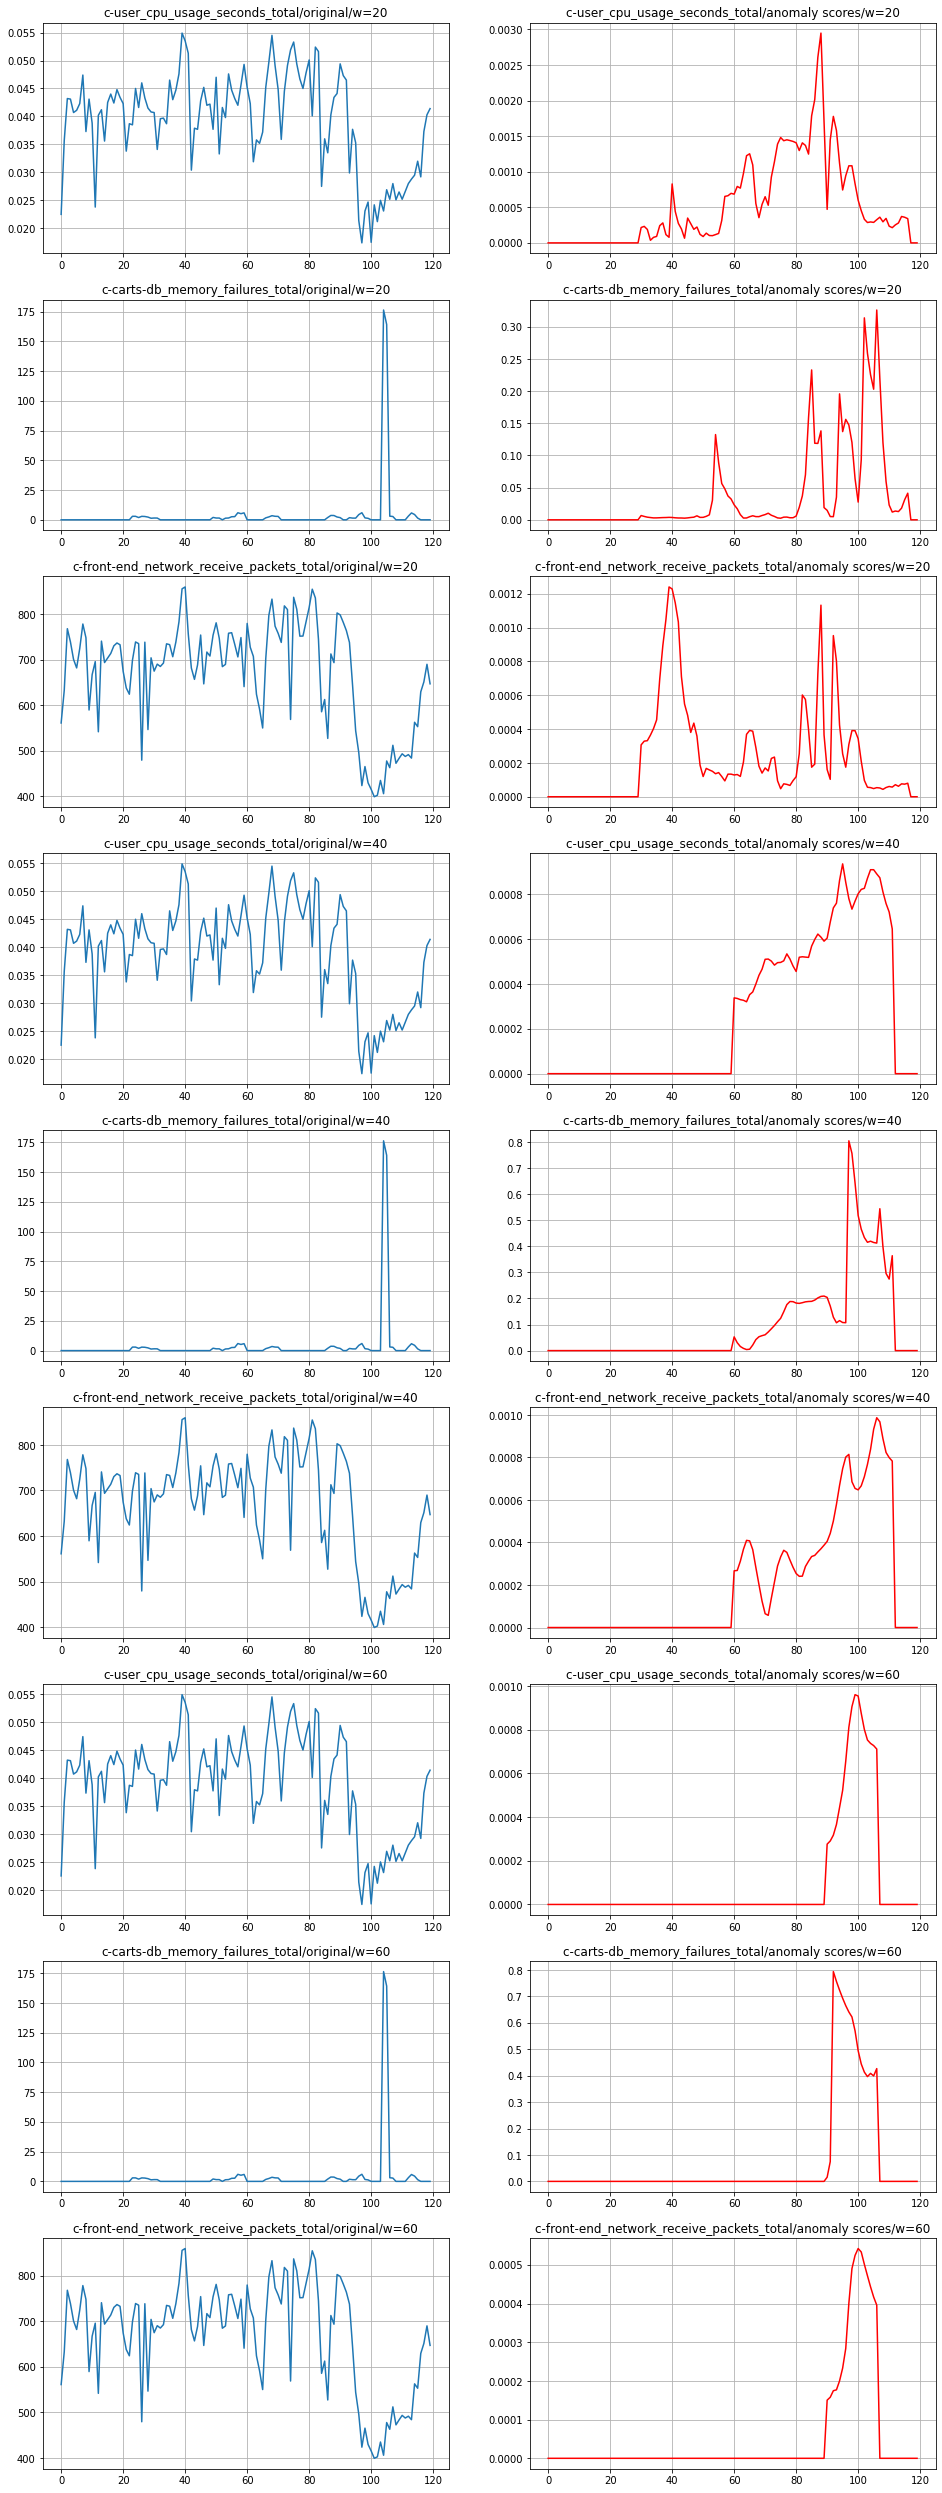

In [25]:
windows = [20, 40, 60]
fig, axs = plt.subplots(len(series)*len(windows), ncols=2)
fig.set_size_inches(16, 5*len(series)*len(windows))

for i, win in enumerate(windows):
    sst = banpei.SST(w=win)

    for (name, ts), ax in zip(series.items(), axs[i*len(series):(i+1)*len(series)*2]):
        %time results = sst.detect(np.array(ts), is_lanczos=True)
        # for idx, score in enumerate(results):
            # ax.axvline(idx, color='red', linestyle='dashed', label='breaks')
        ax[0].set_title(name + '/original' + f'/w={win}')
        ax[0].plot(ts)
        ax[1].set_title(name + '/anomaly scores' + f'/w={win}')
        ax[1].plot(results, color='red')
        [x.grid() for x in ax]


# ChangeFinder